In [1]:
from pathlib import Path
import polars as pl
import numpy as np
import seaborn as sns

data = Path('../data/MSA2024_TIPS_Data.csv')

In [2]:
df = pl.read_csv(data, columns=range(5), new_columns=['1', '2', '3', 'misc', 'year'])
all_years = {year: df.filter(pl.col('year') == year) for year in range(2016, 2024)}

df.shape

(458, 5)

In [3]:
all_years[2023].head()

1,2,3,misc,year
str,str,str,str,i64
"""Keep in mind b…","""Remember to cl…",null,null,2023
"""prioritize lif…",null,"""start the data…",null,2023
"""When they say …","""you are expect…","""Fall 2 is the …","""Don't worry ab…",2023
""" when you are …","""If you are com…","""Depending on y…","""Put your menta…",2023
"""Take good care…","""Don't be shy t…","""Hang out with …","""It's useful to…",2023


In [4]:
all_years[2023].filter(pl.any(pl.col(['1', '2', '3', 'misc']).str.contains('[pP]ython'))).with_row_count()

row_nr,1,2,3,misc,year
u32,str,str,str,str,i64
0,"""Take good care…","""Don't be shy t…","""Hang out with …","""It's useful to…",2023
1,"""Take care of y…","""Make sure to a…","""Make sure to s…",null,2023
2,"""Read your text…",""" When the care…","""You will feel …",null,2023
3,"""Practice SQL a…","""Trust the proc…","""Enjoy, and don…",null,2023
4,"""Keep your mind…","""Putting in the…","""Make friends t…","""Self study Pyt…",2023
5,"""If you have li…","""The career ser…","""If you're an i…",null,2023
6,null,"""Try to use oth…","""Take everythin…",null,2023


# Character Frequencies

In [5]:
print(df.groupby('year').agg(pl.col('1', '2', '3', 'misc').str.n_chars().sum()).sort('year'))
char_freq = df.groupby('year').agg(pl.sum(pl.col('1', '2', '3', 'misc').str.n_chars().sum())).sort('year')

shape: (8, 5)
┌──────┬───────┬───────┬───────┬──────┐
│ year ┆ 1     ┆ 2     ┆ 3     ┆ misc │
│ ---  ┆ ---   ┆ ---   ┆ ---   ┆ ---  │
│ i64  ┆ u32   ┆ u32   ┆ u32   ┆ u32  │
╞══════╪═══════╪═══════╪═══════╪══════╡
│ 2016 ┆ 7577  ┆ 7475  ┆ 6004  ┆ 1281 │
│ 2017 ┆ 10623 ┆ 9693  ┆ 6771  ┆ 1427 │
│ 2018 ┆ 7015  ┆ 5869  ┆ 4944  ┆ 1202 │
│ 2019 ┆ 7717  ┆ 7690  ┆ 6247  ┆ 1466 │
│ 2020 ┆ 10109 ┆ 10211 ┆ 8778  ┆ 3266 │
│ 2021 ┆ 20267 ┆ 15480 ┆ 17871 ┆ 7035 │
│ 2022 ┆ 17023 ┆ 14917 ┆ 10746 ┆ 6168 │
│ 2023 ┆ 13900 ┆ 13989 ┆ 12935 ┆ 3053 │
└──────┴───────┴───────┴───────┴──────┘


<Axes: xlabel='year', ylabel='sum'>

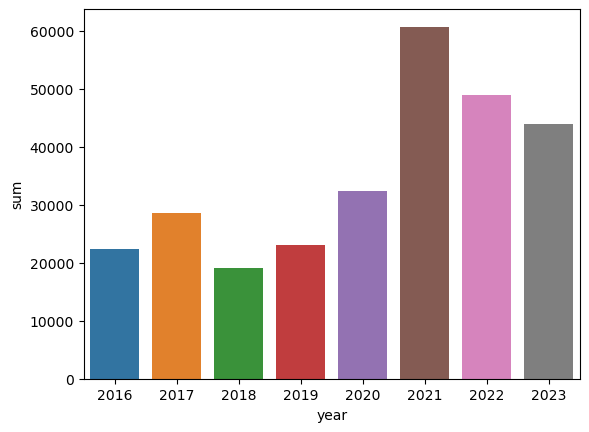

In [6]:
sns.barplot(char_freq.to_pandas(), x='year', y='sum')